# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc_response = requests.get(btc_url).json()
btc_price = btc_response["data"]["1"]["quotes"]["CAD"]["price"]

# Fetch current ETH price
eth_response = requests.get(eth_url).json()
eth_price = eth_response["data"]["1027"]["quotes"]["CAD"]["price"]

# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $72637.46
The current value of your 5.3 ETH is $10287.99


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

ValueError: ('Key ID must be given to access Alpaca trade API', ' (env: APCA_API_KEY_ID)')

In [ ]:
# Format current date as ISO format
today = pd.Timestamp("2020-08-07", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_investments = alpaca.get_barset(
    tickers,
    timeframe,
    start = today
).df

# Preview DataFrame
df_investments.head()

today

In [ ]:
# Pick AGG and SPY close prices
agg_close_price = float(df_investments["AGG"]["close"][0])
spy_close_price = float(df_investments["SPY"]["close"][0])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

In [ ]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

### Savings Health Analysis

In [8]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
savings_data = [
    my_btc_value + my_eth_value,
    my_spy_value + my_agg_value,
]

# Create savings DataFrame
df_savings = pd.DataFrame(savings_data, columns=["amount"], index=["crypto", "shares"])

# Display savings DataFrame
display(df_savings)

NameError: name 'my_spy_value' is not defined

In [9]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Composition of Personal Savings")

NameError: name 'df_savings' is not defined

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = float(df_savings.sum())

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")
elif total_savings == emergency_fund:
    print("Great, You have saved three times your monthly expenses! Keep pushing to increase your savings.")
else:
    print(f"You are ${(emergency_fund - total_savings):0.2f} away from your emergency fund goal, continue saving between 10% and 20% of your monthly income to reach your goal.")

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df


# Display sample data
df_stock_data.head()

AGG                                        \
                             open      high      low   close     volume   
time                                                                      
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167.0   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778.0   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907.0   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979.0   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173.0   

                              SPY                                     
                             open    high     low   close     volume  
time                                                                  
2015-08-07 00:00:00-04:00  208.16  208.34  206.87  207.93   87669782  
2015-08-10 00:00:00-04:00  209.28  210.67  209.28  210.58   66755890  
2015-08-11 00:00:00-04:00  208.98  209.47  207.76  208.63   88424557  
2015-08-12 00:00:00-04:00  207.11  209.14  205.36  208.89  136171450  
2015-08-13 00:00:00-04:00  208.73  209.55  208.01  208.63   77197796

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252 * 30
)

In [17]:
# Printing the simulation input data
MC_thirty_year.portfolio_data.head()

AGG                                        \
                             open      high      low   close     volume   
time                                                                      
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167.0   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778.0   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907.0   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979.0   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2015-08-07 00:00:00-04:00          NaN  208.16  208.34  206.87  207.93   
2015-08-10 00:00:00-04:00    -0.001374  209.28  210.67  209.28  210.58   
2015-08-11 00:00:00-04:00     0.003301  208.98  209.47  207.76  208.63   
2015-08-12 00:00:00-04:00    -0.000548  207.11  209.14  205.36  208.89   
2015-08-13 00:00:00-04:00    -0.001920  208.73  209.55  208.01  208.63   

                                                   
                              volume daily_return  
time                                               
2015-08-07 00:00:00-04:00   87669782          NaN  
2015-08-10 00:00:00-04:00   66755890     0.012745  
2015-08-11 00:00:00-04:00   88424557    -0.009260  
2015-08-12 00:00:00-04:00  136171450     0.001246  
2015-08-13 00:00:00-04:00   77197796    -0.001245

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.012170,0.994981,1.004991,1.008083,0.992338,1.003693,0.997442,0.997419,1.004467,1.001001,...,0.998730,1.017958,0.994828,1.004039,1.004675,0.991405,0.999658,0.984823,0.999033,0.997343
2,1.003229,0.998152,1.000877,1.001614,0.998849,1.013039,0.999966,0.996169,1.009402,1.000849,...,0.984897,1.017409,0.998944,1.007633,1.000862,0.998761,1.001962,0.985544,1.004713,1.009804
3,0.993659,1.002329,0.999381,0.991489,1.000093,1.005613,1.001967,1.002389,1.005477,1.009001,...,0.987968,1.014295,0.987588,1.006828,0.991811,1.006248,1.004710,0.994452,0.997098,1.002981
4,0.975981,0.997215,1.002484,0.996241,0.987323,0.999005,1.006846,0.995341,1.007056,1.010028,...,0.982865,1.028582,0.977760,1.013414,0.988205,0.999757,1.004060,1.002508,0.994301,1.014507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,15.455060,3.286531,12.376798,22.953580,3.105295,3.586332,8.911062,12.128220,20.132978,24.257558,...,20.224305,6.383871,18.336263,40.566870,20.395027,9.810762,4.825109,8.069766,7.516738,25.318228
7557,15.499624,3.294705,12.528650,22.947484,3.098415,3.572425,8.882054,12.166053,20.017686,24.457469,...,20.041699,6.370361,18.386141,40.747874,20.543932,9.821197,4.759088,8.104888,7.433603,25.662789
7558,15.627405,3.340239,12.522443,22.936539,3.141378,3.540512,8.756228,12.183351,19.897816,24.237056,...,20.276292,6.346066,18.439562,40.552404,20.600348,9.803267,4.806386,8.090386,7.405567,25.595508
7559,15.789893,3.310189,12.544250,23.412562,3.137129,3.543273,8.724980,12.130267,19.817068,24.285594,...,20.359077,6.288498,18.568616,40.270228,20.649324,9.823658,4.745824,8.092860,7.454034,25.850496


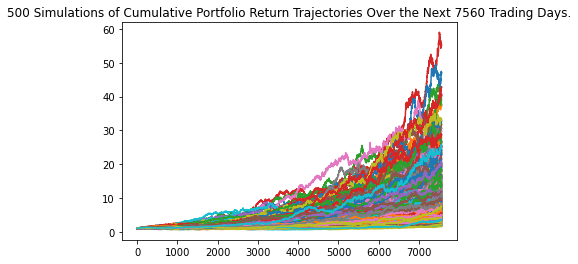

In [19]:
# Plot simulation outcomes
line_plot = MC_thirty_year.plot_simulation()

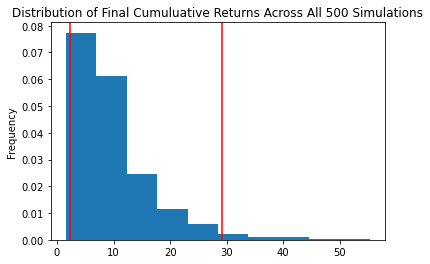

In [20]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirty_year.plot_distribution()

### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirty_year.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean             10.067594
std               7.287539
min               1.566451
25%               5.235067
50%               8.083437
75%              12.448603
max              55.335841
95% CI Lower      2.286472
95% CI Upper     29.241828
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [22]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8] * initial_investment,2)
ci_upper = round(tbl[9] * initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $45729.44 and $584836.57


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [23]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8] * initial_investment,2)
ci_upper = round(tbl[9] * initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $68594.16 and $877254.85


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.80,.20],
    num_simulation = 500,
    num_trading_days = 252 * 5
)

In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001089,1.003359,0.999661,0.996257,1.003690,1.001079,0.996234,0.998342,1.003248,0.994673,...,0.997985,1.000359,0.995186,1.001266,0.995298,0.996382,1.002694,1.006275,1.002411,0.998522
2,1.006226,0.996989,1.002427,0.996186,1.001730,1.004198,0.992098,0.996823,1.002519,0.993344,...,0.999368,1.007129,0.996368,0.993560,0.989878,0.992829,1.001232,1.002925,1.004072,1.001121
3,1.013193,0.998632,1.007169,0.999494,1.001088,1.006790,0.990354,0.998447,1.006117,0.996693,...,0.996900,1.006001,0.993440,0.993214,0.986418,0.996680,0.996285,1.005915,1.001946,1.000908
4,1.017885,0.997215,1.008394,1.001299,1.004017,1.010497,0.992739,0.994147,1.010774,0.996203,...,0.996635,1.010330,0.995490,0.995529,0.986890,1.003492,0.992416,1.010471,0.999234,0.999971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.271397,1.463136,1.293121,1.277955,1.437715,1.353400,1.062799,1.272647,1.342916,1.071184,...,1.400468,1.187116,1.359500,0.990100,1.186189,1.144863,1.385155,1.300140,1.237118,1.312042
1257,1.269374,1.454486,1.298938,1.281978,1.435707,1.356888,1.065013,1.271246,1.343728,1.063569,...,1.397623,1.180383,1.360162,0.993935,1.184489,1.142744,1.388916,1.295257,1.236560,1.309549
1258,1.272327,1.450957,1.296769,1.284936,1.438084,1.361588,1.064322,1.272659,1.346741,1.071247,...,1.393346,1.177080,1.361680,0.992379,1.179187,1.139334,1.383447,1.295214,1.229412,1.306098
1259,1.269247,1.455322,1.301712,1.287801,1.431840,1.367703,1.068572,1.274598,1.342907,1.067916,...,1.394823,1.174952,1.364187,0.990596,1.172493,1.133956,1.392095,1.290591,1.228645,1.302854


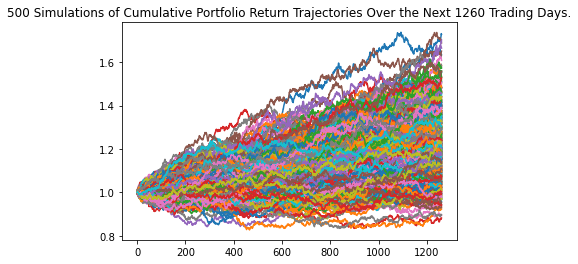

In [26]:
# Plot simulation outcomes
line_plot_five = MC_five_year.plot_simulation()

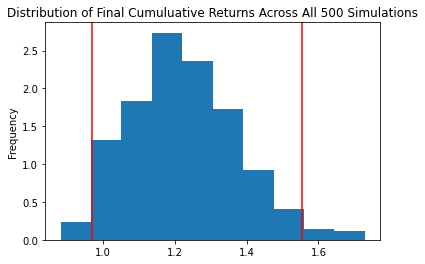

In [27]:
# Plot probability distribution and confidence intervals
dist_plot_five = MC_five_year.plot_distribution()

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_five = MC_five_year.summarize_cumulative_return()

# Print summary statistics
print(tbl_five)

count           500.000000
mean              1.223337
std               0.150613
min               0.881381
25%               1.115957
50%               1.210526
75%               1.322743
max               1.729319
95% CI Lower      0.969175
95% CI Upper      1.554495
Name: 1260, dtype: float64


In [29]:
# Set initial investment
initial_investment = 20000 * 3

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl_five[8] * initial_investment,2)
ci_upper_five = round(tbl_five[9] * initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $58150.51 and $93269.69


### Ten Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.80,.20],
    num_simulation = 500,
    num_trading_days = 252 * 10
)

In [31]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996978,1.001251,0.999692,0.995775,1.003979,1.001730,0.999396,1.000094,0.998434,0.989652,...,0.998571,1.002088,0.999255,0.997654,0.993203,1.000915,1.003852,0.998151,0.999658,0.997131
2,1.001193,0.995860,1.002264,0.991984,1.000345,0.999993,0.995570,1.002920,1.000579,0.993764,...,1.000679,1.000117,1.001408,0.999798,0.996811,0.999051,1.000571,0.995256,0.992950,1.000668
3,0.996987,1.001991,1.001736,0.989026,0.999345,1.001165,0.991635,1.002693,1.000448,0.993345,...,1.000842,1.000766,1.002374,1.000188,0.994749,0.999250,1.003776,0.994455,0.992564,1.001384
4,0.997255,1.000659,1.004607,0.979777,0.999352,0.999925,0.990200,1.002440,1.002873,0.990222,...,0.998771,1.000083,1.006794,1.002333,0.996845,0.998135,0.999483,0.996479,0.991819,1.005340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.709186,1.640758,1.289501,1.479926,1.265602,1.703241,1.628659,1.585358,1.462003,1.519708,...,1.291693,1.383653,1.203661,1.789718,1.791707,2.168612,1.362563,1.759827,1.265842,0.969629
2517,1.704610,1.645235,1.289967,1.466519,1.274237,1.709728,1.623605,1.585330,1.454342,1.517495,...,1.292888,1.387405,1.199443,1.783713,1.785707,2.179629,1.365150,1.763200,1.268889,0.970454
2518,1.705721,1.641793,1.294098,1.464614,1.275187,1.707445,1.619323,1.582150,1.461165,1.503523,...,1.299460,1.388050,1.196381,1.788855,1.787462,2.178719,1.368865,1.762248,1.264554,0.966753
2519,1.711104,1.638130,1.294774,1.471228,1.268741,1.707199,1.629883,1.581903,1.471583,1.503721,...,1.296525,1.388455,1.190983,1.794831,1.791386,2.191457,1.366795,1.767121,1.258174,0.963845


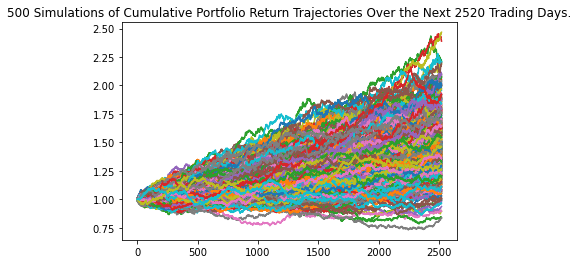

In [32]:
# Plot simulation outcomes
line_plot_ten = MC_ten_year.plot_simulation()

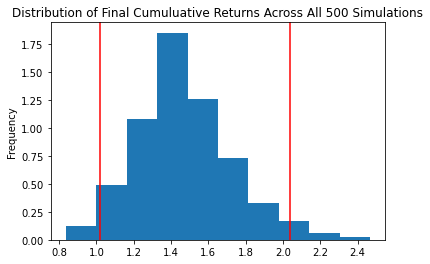

In [33]:
# Plot probability distribution and confidence intervals
dist_plot_ten = MC_ten_year.plot_distribution()

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_ten = MC_ten_year.summarize_cumulative_return()

# Print summary statistics
print(tbl_ten)

count           500.000000
mean              1.473900
std               0.255909
min               0.835992
25%               1.304180
50%               1.445096
75%               1.629975
max               2.467345
95% CI Lower      1.017827
95% CI Upper      2.038012
Name: 2520, dtype: float64


In [35]:
# Set initial investment
initial_investment = 20000 * 3

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl_ten[8] * initial_investment,2)
ci_upper_ten = round(tbl_ten[9] * initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $61069.61 and $122280.75
